** Notebook - Run SQL Queries for EDA, Data Wrangling, Data Visualization and Modeling ** <br>
Dataset: Wyoming Oil and Gas Conservation Commission


Importing the basic modules <br>
Data Analysis Library: Pandas, https://pandas.pydata.org/
Visualization Library: Matplotlib, https://matplotlib.org/

In [1]:
import sqlite3                    
import pandas as pd # data processing and csv file IO library
import numpy as np       
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # python graphing library
plt.style.use('seaborn')
sns.set(style="white", color_codes=True)

# plt.rcdefaults() # resest to default matplotlib parameters 
import warnings #ignore unwanted messages
warnings.filterwarnings("ignore")

In order to access the database components, we need to open the connection to the .sqlite file and use the cursor

In [2]:
conn = sqlite3.connect(r'C:\Users\AyushRastogi\Downloads\PowderDb.sqlite')
cur = conn.cursor()

Now we need to bring the entire table into Pandas dataframe, so we can run SQL queries and obtain the desired part of data

- https://sqlite.org/docs.html
- https://sqlite.org/optoverview.html

In [5]:
# SQL Query - Entire data from database converted to a dataframe
data = pd.read_sql_query(''' SELECT * FROM Production;''', conn)
print (data.head(10)) #default head() function prints 5 results
print (data.shape) # in the form of rows x columns

    Apino                 Wellname  County                       Company  \
0  305030  SPENCE DOME B-019946 14       3           ENDEAVOR ENERGY LLC   
1  305036                COZZENS 4       3          MERIT ENERGY COMPANY   
2  305037                COZZENS 3       3          MARATHON OIL COMPANY   
3  305040             C LINDSAY 1H       3          MERIT ENERGY COMPANY   
4  305040             C LINDSAY 1H       3          MERIT ENERGY COMPANY   
5  305058           AJAX 0-11185 3       3     WASHAKIE ENERGIES COMPANY   
6  305061        WY State 0-3593 1       3  LEGACY RESERVES OPERATING LP   
7  305062                   AJAX 2       3     WASHAKIE ENERGIES COMPANY   
8  305063                 MENGER 3       3  LEGACY RESERVES OPERATING LP   
9  305072           STATE 0-4198 2       3  LEGACY RESERVES OPERATING LP   

    Field_Name Horiz_Dir  Sec  Twp T_Dir  Rge    ...     Gravity03 Gravity04  \
0  SPENCE DOME         N    9   54     N   94    ...          19.0      20.0   
1  

In [7]:
index_data = data.index
print(index_data)
col = data.columns # good idea to print this if multiple columns are present
print(col)

RangeIndex(start=0, stop=350370, step=1)
Index(['Apino', 'Wellname', 'County', 'Company', 'Field_Name', 'Horiz_Dir',
       'Sec', 'Twp', 'T_Dir', 'Rge', 'R_Dir', 'Qtr1', 'Qtr2', 'Lat', 'Lon',
       'Yr', 'Jan_oil', 'Jan_gas', 'Jan_water', 'Jan_days', 'Feb_oil',
       'Feb_gas', 'Feb_water', 'Feb_days', 'Mar_oil', 'Mar_gas', 'Mar_water',
       'Mar_days', 'Apr_oil', 'Apr_gas', 'Apr_water', 'Apr_days', 'May_oil',
       'May_gas', 'May_water', 'May_days', 'Jun_oil', 'Jun_gas', 'Jun_water',
       'Jun_days', 'Jul_oil', 'Jul_gas', 'Jul_water', 'Jul_days', 'Aug_oil',
       'Aug_gas', 'Aug_water', 'Aug_days', 'Sep_oil', 'Sep_gas', 'Sep_water',
       'Sep_days', 'Oct_oil', 'Oct_gas', 'Oct_water', 'Oct_days', 'Nov_oil',
       'Nov_gas', 'Nov_water', 'Nov_days', 'Dec_oil', 'Dec_gas', 'Dec_water',
       'Dec_days', 'Formation', 'Wellclass', 'Coalbed', 'Gravity01',
       'Gravity02', 'Gravity03', 'Gravity04', 'Gravity05', 'Gravity06',
       'Gravity07', 'Gravity08', 'Gravity09', 'Gravi

In [38]:
# looking into the number of companies we have in the dataset - descending order
print (data['Formation'].value_counts())

BIG GEORGE                                    81351
WYODAK                                        34094
ANDERSON                                      22416
WALL                                          17294
CANYON                                        15791
MUDDY                                         15519
TURNER                                         9809
NEWCASTLE                                      8442
MINNELUSA                                      7851
COOK                                           7528
SHANNON                                        6812
TEAPOT                                         5805
SUSSEX                                         5457
PARKMAN                                        5402
CARNEY                                         3444
MADISON                                        3117
CANYON LOWER                                   3044
ANDERSON-CANYON                                2867
TENSLEEP                                       2779
PAWNEE      

In [10]:
data['Sum'] =  data[['Jan_oil', 'Feb_oil', 'Mar_oil', 'Apr_oil', 'May_oil', 'Jun_oil', 'Jul_oil', 'Aug_oil', 'Sep_oil',
                       'Oct_oil', 'Nov_oil', 'Dec_oil']].sum(axis=1)
data = data.sort_values(by=['Sum'], ascending = False)
data.head() # will show top 5 results

,Apino,Wellname,County,Company,Field_Name,Horiz_Dir,Sec,Twp,T_Dir,Rge,...,Gravity04,Gravity05,Gravity06,Gravity07,Gravity08,Gravity09,Gravity10,Gravity11,Gravity12,Sum
173932,562201,WRIGHT FED 05-084372-1XPH,5,DEVON ENERGY PRODUCTION COMPANY LP,HOUSE CREEK,H,5,43,N,72,...,37.0,38.0,37,38,38,38,38,38.0,38.0,342876
219478,930138,SUNDQUIST 9-34-71 USA A TR 13H,9,CHESAPEAKE OPERATING LLC,WC,H,9,34,N,71,...,42.0,42.0,41,41,41,41,42,42.0,42.0,288621
173859,561934,IBERLIN 1-19TH,5,PEAK POWDER RIVER RESOURCES LLC,WC,H,19,42,N,74,...,0.0,0.0,0,0,0,0,0,0.0,0.0,264322
195427,562353,BEHEMOTH FEDERAL COM 1PH,5,EOG Y RESOURCES INC,WC,H,30,43,N,72,...,40.0,40.0,40,40,39,39,39,39.0,40.0,248729
174007,562501,NINE MILE 1-1TH,5,PEAK POWDER RIVER RESOURCES LLC,WC,H,1,42,N,75,...,0.0,0.0,0,0,0,0,0,0.0,0.0,246549


In [5]:
data_top25 = data.iloc[0:25] #Selecting the top 25 rows of the dataframe
data_top25

,Apino,Wellname,County,Company,Field_Name,Horiz_Dir,Sec,Twp,T_Dir,Rge,...,Gravity04,Gravity05,Gravity06,Gravity07,Gravity08,Gravity09,Gravity10,Gravity11,Gravity12,Sum
173932,562201,WRIGHT FED 05-084372-1XPH,5,DEVON ENERGY PRODUCTION COMPANY LP,HOUSE CREEK,H,5,43,N,72,...,37.0,38.0,37,38,38,38,38,38.0,38.0,342876
219478,930138,SUNDQUIST 9-34-71 USA A TR 13H,9,CHESAPEAKE OPERATING LLC,WC,H,9,34,N,71,...,42.0,42.0,41,41,41,41,42,42.0,42.0,288621
173859,561934,IBERLIN 1-19TH,5,PEAK POWDER RIVER RESOURCES LLC,WC,H,19,42,N,74,...,0.0,0.0,0,0,0,0,0,0.0,0.0,264322
195427,562353,BEHEMOTH FEDERAL COM 1PH,5,EOG Y RESOURCES INC,WC,H,30,43,N,72,...,40.0,40.0,40,40,39,39,39,39.0,40.0,248729
174007,562501,NINE MILE 1-1TH,5,PEAK POWDER RIVER RESOURCES LLC,WC,H,1,42,N,75,...,0.0,0.0,0,0,0,0,0,0.0,0.0,246549
195539,562941,T COSNER FED 29-324372-4XPH,5,DEVON ENERGY PRODUCTION COMPANY LP,HOUSE CREEK,H,29,43,N,72,...,40.0,40.0,40,39,39,39,40,40.0,40.0,244118
173994,562413,WRIGHT FED 05-084372-2XPH,5,DEVON ENERGY PRODUCTION COMPANY LP,HOUSE CREEK,H,5,43,N,72,...,37.0,38.0,37,38,38,38,38,38.0,38.0,241791
195538,562940,T COSNER FED 29-324372-3XPH,5,DEVON ENERGY PRODUCTION COMPANY LP,HOUSE CREEK,H,29,43,N,72,...,40.0,40.0,40,39,39,39,40,40.0,40.0,235915
217737,929620,MARYS DRAW 19-34H,9,EOG RESOURCES INC,CROSSBOW,H,34,40,N,72,...,48.0,48.0,48,48,48,48,48,48.0,50.0,231422
214369,929269,COMBS 29-33-70 C SX 7H,9,CHESAPEAKE OPERATING LLC,WC,H,29,33,N,70,...,48.0,49.0,48,48,48,50,50,51.0,51.0,229504


In [6]:
# Install using this command -> conda install -c conda-forge basemap
# https://matplotlib.org/basemap/

#Identify the location of top 25 wells

from mpl_toolkits.basemap import Basemap
lon = data_top25.Lon.values # remove the index column
lat = data_top25.Lat.values # remove the index column

plt.figure(figsize=(10,15))
m = Basemap(projection='merc',llcrnrlat=30,urcrnrlat=50,\
            llcrnrlon=-120,urcrnrlon=-100,lat_ts=20,resolution='l')

m.shadedrelief()
#m.etopo()
#m.bluemarble()

m.drawcounties(linewidth=0.1, linestyle='solid', color='k', antialiased=1, facecolor='none', ax=None, zorder=None, drawbounds=False)
m.drawstates(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)

#m.readshapefile(shapefile=r'C:\Users\ayush\Desktop\WOGCC\WY Shape Files\tl_2013_56_cousub',name = m)

plt.title("Rockies State Map",fontname="Times New Roman",fontweight="bold", fontsize = 20)

x,y = m(lon, lat)           
m.plot(x,y, 'ro', markersize=5, alpha=1, zorder=0.8)
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

Text(0,0.5,'Production')

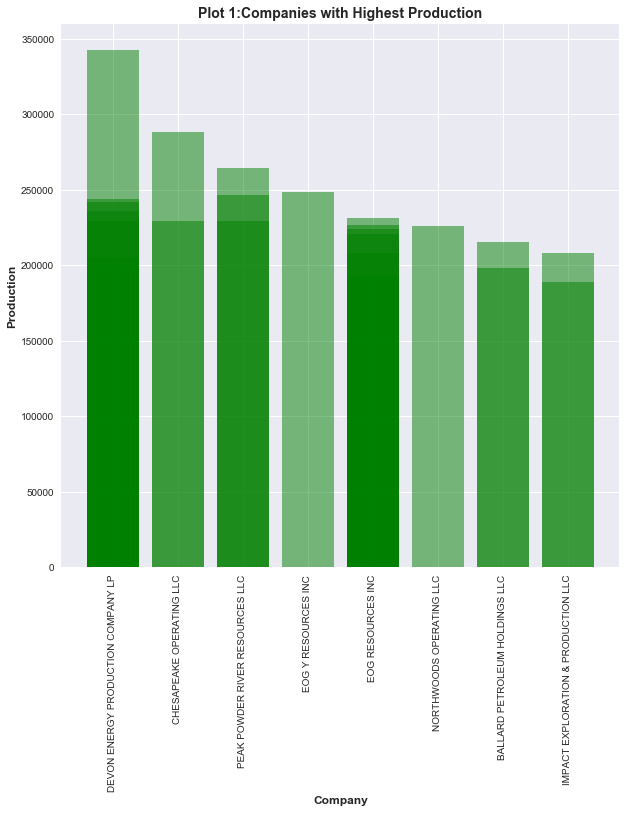

In [7]:
# Plot 1: Identify the company with the highest production

x = np.arange(len(data_top25['Company']))
fig, ax = plt.subplots()
axes = plt.gca()
fig.set_size_inches(10, 10)
plt.xticks(x, rotation=90)
plt.bar(data_top25.Company,data_top25.Sum, align='center', alpha=0.5, color = 'g')
ax.set_title('Plot 1:Companies with Highest Production', fontsize=14, fontweight='bold')
ax.set_xlabel('Company', fontsize = 12, fontweight='bold')
ax.set_ylabel('Production', fontsize = 12, fontweight='bold')

In [8]:
#Query to sum the monthly production

data2 = pd.read_sql_query('''
            SELECT Yr, Sum(Jan_oil), Sum(Feb_oil), Sum(Mar_oil), Sum(Apr_oil), Sum(May_oil), Sum(Jun_oil), 
            Sum(Jul_oil), Sum(Aug_oil), Sum(Sep_oil), Sum(Oct_oil), Sum(Nov_oil), Sum(Dec_oil)
            FROM Production
            GROUP BY Yr
            ;''', conn)
data2

,Yr,Sum(Jan_oil),Sum(Feb_oil),Sum(Mar_oil),Sum(Apr_oil),Sum(May_oil),Sum(Jun_oil),Sum(Jul_oil),Sum(Aug_oil),Sum(Sep_oil),Sum(Oct_oil),Sum(Nov_oil),Sum(Dec_oil)
0,2007,1326239,1188124,1322765,1304627,1320825,1278971,1300917,1307869,1273269,1310847,1264613,1251896
1,2008,1237382,1180513,1257333,1222345,1224562,1197665,1236779,1239532,1194034,1230154,1196601,1178102
2,2009,1194257,1097554,1145185,1126514,1179618,1118256,1142731,1156972,1132562,1173762,1160225,1114585
3,2010,1155913,1074388,1226175,1166295,1212212,1207464,1257135,1257911,1258566,1285737,1207490,1270039
4,2011,1234705,1154633,1321643,1327889,1366076,1340407,1381504,1362753,1329055,1418733,1423912,1536782
5,2012,1503088,1476358,1600834,1476911,1556794,1492375,1695403,1725623,1675016,1715639,1751866,1837627
6,2013,1840302,1784481,2095033,2000760,2166897,2125338,2051077,2348964,2356994,2352993,2406536,2340212
7,2014,2509743,2320644,2743999,2746090,2971616,3005564,3134516,3363402,3337196,3642045,3353902,3698856
8,2015,3837345,3531656,4171639,4160283,4107121,3823593,3894225,3839443,3583268,3733573,3580201,3680590
9,2016,3433903,3096883,3215977,2952157,2893941,2686663,2868696,2786737,2584337,2757465,2613300,2502541


In [ ]:
#data2 = data2[data2.Yr != 2018] # Get rid of 2018 row since its incomplete

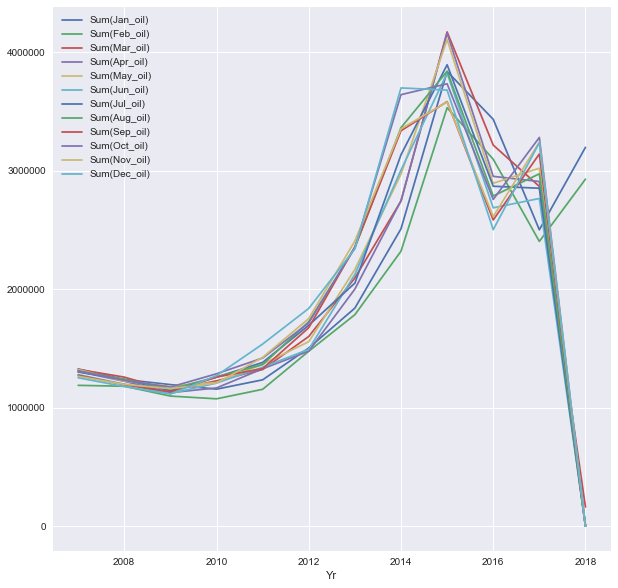

In [9]:
data2.set_index('Yr').plot(figsize=(10,10), grid=True)

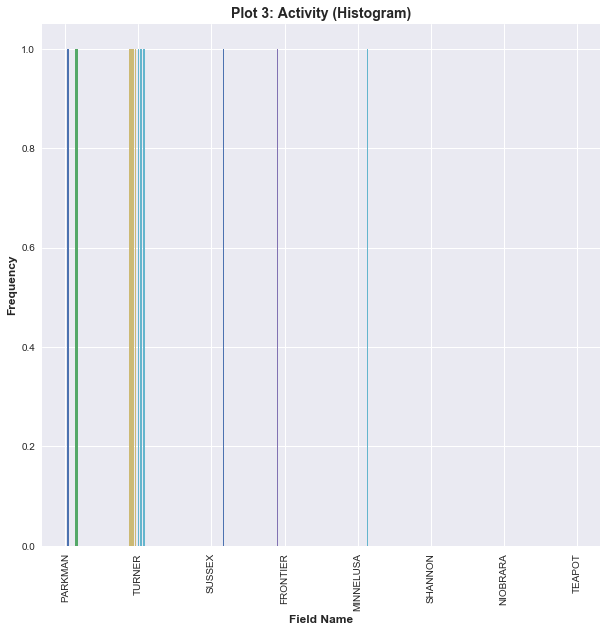

In [10]:
# Visualization to identify top producing fields, here we will look at top 100 wells

fig, ax = plt.subplots()                                    
fig.set_size_inches(10, 10)                                  
fig.subplots_adjust(top=0.85)
ax.set_title('Plot 3: Activity (Histogram)', fontsize=14, fontweight='bold')
ax.set_xlabel('Field Name', fontsize = 12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize = 12, fontweight='bold')
plt.grid(True)
plt.xticks(rotation=90)

ax.hist(data[:100]['Formation'], bins = 25)
plt.show()

**Start of the session 2**

In [14]:
data_sess2= pd.read_sql_query('''SELECT Apino, Yr, Jan_oil, Feb_oil, Mar_oil, Apr_oil, May_oil, Jun_oil, Jul_oil, Aug_oil, Sep_oil, Oct_oil, Nov_oil, Dec_oil, Jan_days, Feb_days, Mar_days, Apr_days, May_days, Jun_days, Jul_days, Aug_days, Sep_days, Oct_days, Nov_days, Dec_days
FROM Production
ORDER BY Apino;''', conn)

data_sess2

,Apino,Yr,Jan_oil,Feb_oil,Mar_oil,Apr_oil,May_oil,Jun_oil,Jul_oil,Aug_oil,...,Mar_days,Apr_days,May_days,Jun_days,Jul_days,Aug_days,Sep_days,Oct_days,Nov_days,Dec_days
0,305030,2007,50,44,48,46,50,44,44,49,...,31,30,31,30,31,31,30,31,30,31
1,305030,2008,48,46,49,40,61,48,48,43,...,31,30,31,30,30,31,30,30,30,31
2,305030,2009,49,49,49,48,43,43,40,46,...,31,29,31,30,31,31,30,30,30,30
3,305030,2010,49,43,45,47,49,44,46,40,...,31,30,31,29,31,31,31,31,30,31
4,305030,2011,39,38,46,48,40,41,43,41,...,31,30,31,29,31,31,30,31,30,31
5,305030,2012,43,38,41,41,42,38,41,43,...,31,30,31,20,31,27,30,29,30,31
6,305030,2013,40,40,40,40,44,46,7,30,...,29,30,31,30,4,24,30,31,30,31
7,305030,2014,34,31,35,34,10,31,31,32,...,31,28,12,30,31,31,30,31,30,31
8,305030,2015,35,32,35,18,0,18,18,36,...,31,14,0,16,31,31,30,31,30,31
9,305030,2016,35,33,20,31,33,32,18,0,...,24,30,31,30,22,0,30,31,30,31


In [69]:
data_test = pd.read_sql_query('''SELECT Apino, Yr, Jan_oil, Dec_oil,Jan_days, Dec_days
FROM Production
ORDER BY Apino;''', conn)
data_test

,Apino,Yr,Jan_oil,Dec_oil,Jan_days,Dec_days
0,305030,2007,50,49,31,31
1,305030,2008,48,45,31,31
2,305030,2009,49,49,31,30
3,305030,2010,49,38,31,31
4,305030,2011,39,43,31,31
5,305030,2012,43,42,31,31
6,305030,2013,40,33,31,31
7,305030,2014,34,33,31,31
8,305030,2015,35,35,31,31
9,305030,2016,35,35,31,31


In [70]:
p = data_test.pivot_table(index='Apino', columns = 'Yr')
p

Dec_days                                                        \
Yr          2007  2008  2009  2010  2011  2012  2013  2014  2015  2016   
Apino                                                                    
305030      31.0  31.0  30.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0   
305036       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
305037       0.0   0.0   0.0   0.0   0.0   0.0  99.0   NaN   NaN   NaN   
305040      31.0  30.0  31.0  31.0  31.0  28.0  31.0  31.0  31.0  31.0   
305058       0.0  18.0  23.0  25.0  31.0  30.0  31.0   0.0  31.0   0.0   
305061       0.0   3.0   9.0   0.0   0.0   0.0   0.0   2.0   6.0  26.0   
305062      99.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
305063      31.0  31.0  31.0  30.0   0.0  31.0   0.0   0.0   5.0  26.0   
305072      31.0  31.0  23.0  30.0  29.0  31.0  31.0  31.0  31.0  26.0   
305086      31.0   0.0  31.0  30.0  31.0  31.0   0.0   0.0   0.0   0.0   
305088      31.0  31.0  30.0  30.0  31.0  31.0  31.0  31.0   0.0   0.0   
305091       0.0  27.0  29.0  30.0   0.0   0.0  31.0  31.0  31.0  31.0   
305093      31.0  31.0  31.0  30.0  31.0  31.0  31.0  31.0  31.0  31.0   
305098      31.0  31.0  31.0  30.0  31.0  31.0  31.0  31.0  31.0  31.0   
305103       0.0  31.0  31.0  30.0  31.0  31.0   0.0   0.0   0.0   0.0   
305104      31.0  31.0  31.0  30.0  31.0  31.0  31.0  31.0   0.0   0.0   
305121      29.0  31.0  31.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
305129      31.0  31.0  31.0  30.0  31.0  31.0  31.0  31.0  31.0  31.0   
305135      31.0  31.0  25.0  30.0   0.0  31.0   0.0   0.0   0.0  31.0   
305171      31.0  31.0  31.0  31.0  31.0  16.0  17.0  30.0  31.0   0.0   
305216       0.0  31.0  31.0  24.0  31.0   0.0   0.0  30.0  27.0   0.0   
305217      15.5  65.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0   0.0   
305224      99.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
305225      31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0   0.0   
305226       1.0   2.0  31.0  31.0   0.0  31.0  31.0  31.0  31.0  11.0   
305230       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
305234       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
305240      31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0   0.0   
305254      31.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
305258      31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0  31.0   0.0   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
4529386      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  31.0   0.0   
4529388      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4529390      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4529397      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  31.0  31.0   
4529398      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  31.0  31.0   
4529399      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  31.0  31.0   
4529408      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   
4529410      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   
4529411      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   6.0   
4529412      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   6.0   
4529413      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   6.0   
4529414      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   8.0   
4529418      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  31.0  31.0   
4529419      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  31.0  31.0   
4529420      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  31.0  31.0   
4529421      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  31.0  30.0   
4529422      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4529425      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  31.0  31.0   
4529426      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4529427      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4529430     

In [41]:
# Running Query for Data Visualization 
# SQL Query - Categorical data with highest Jan production 
data_viz = pd.read_sql_query(''' SELECT Wellname, County, Company, Field_name, Yr, Jan_oil, Formation, Wellclass
                             FROM Production
                             ORDER BY Jan_oil DESC
                             LIMIT 25
                             ;''', conn)
print (data_viz.head(10)) #default head() function prints 5 results
print (data_viz.shape) # in the form of rows x columns

                        Wellname  County                              Company  \
0             ARBALEST 245-3304H       9                    EOG RESOURCES INC   
1                 DILTS 44-14 TH       5       BALLARD PETROLEUM HOLDINGS LLC   
2            MARYS DRAW 26-0310H       9                    EOG RESOURCES INC   
3        T COSNER FED 204372-2PH       5   DEVON ENERGY PRODUCTION COMPANY LP   
4           MARYS DRAW 455-0310H       9                    EOG RESOURCES INC   
5       CLOVER FED 4177-12-1-1FH      19             NORTHWOODS OPERATING LLC   
6  IBERLIN RANCH FED 044176-1XFH       5   DEVON ENERGY PRODUCTION COMPANY LP   
7             ARBALEST 436-3304H       9                    EOG RESOURCES INC   
8     WERNER FED 13-123669-1XTPH       9   DEVON ENERGY PRODUCTION COMPANY LP   
9              FEDERAL 16-10/3FH       9  IMPACT EXPLORATION & PRODUCTION LLC   

      Field_Name    Yr  Jan_oil Formation Wellclass  
0       CROSSBOW  2015    38611   PARKMAN         O  


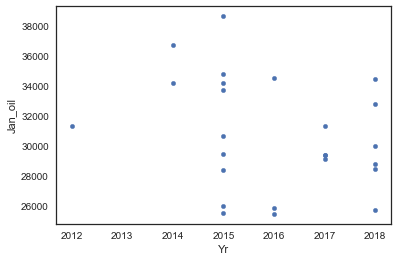

In [45]:
# Trying different types of ways we can plot - Scatter
data_viz.plot(kind="scatter", x="Yr", y="Jan_oil") # Style 1

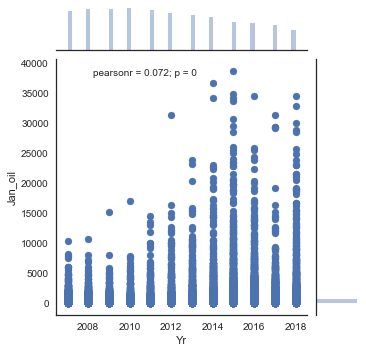

In [46]:
sns.jointplot(x="Yr", y="Jan_oil", data=data, size=5) # Style 2 - using seaborn

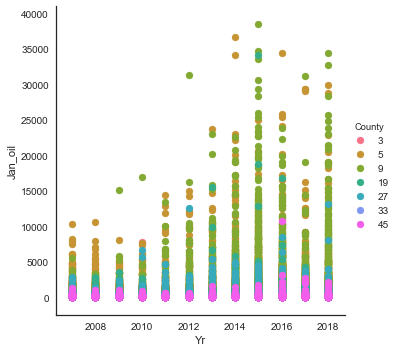

In [48]:
# We'll use seaborn's FacetGrid to color the scatterplot by County
sns.FacetGrid(data, hue="County", size=5) \
   .map(plt.scatter, "Yr", "Jan_oil") \
   .add_legend()

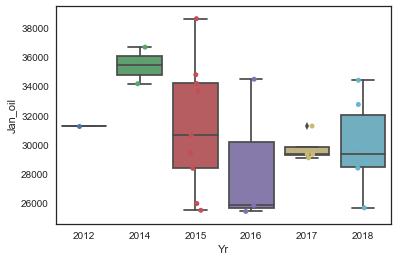

In [49]:
'''Boxplot: Adding a layer of individual points on top of it through 
Seaborn's striplot. We'll use jitter=True so that all the points don't fall in single vertical lines
above the species. Saving the resulting axes as ax each time causes the resulting plot to be shown
on top of the previous axes'''
ax = sns.boxplot(x="Yr", y="Jan_oil", data=data_viz)
ax = sns.stripplot(x="Yr", y="Jan_oil", data=data_viz, jitter=True, edgecolor='gray')

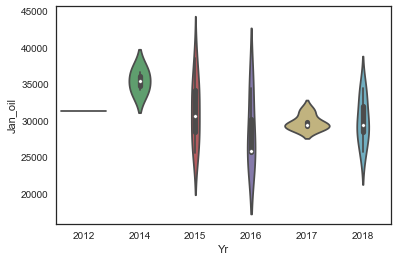

In [51]:
'''A violin plot combines the benefits of the previous two plots and simplifies them.
Denser regions of the data are fatter, and sparser thiner in a violin plot'''
sns.violinplot(x="Yr", y="Jan_oil", data=data_viz, size=6)

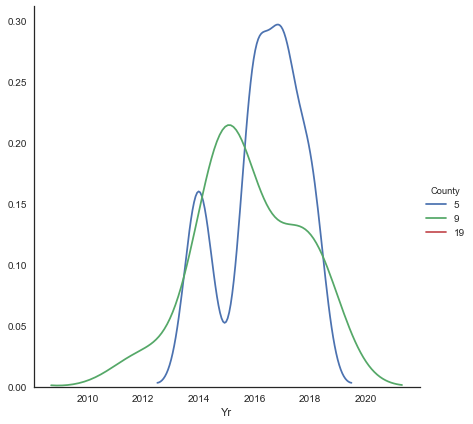

In [54]:
'''A final seaborn plot useful for looking at univariate relations is the kdeplot, 
Creates and visualizes a kernel density estimate of the underlying feature'''

sns.FacetGrid(data_viz, hue="County", size=6) \
   .map(sns.kdeplot, "Yr") \
   .add_legend()

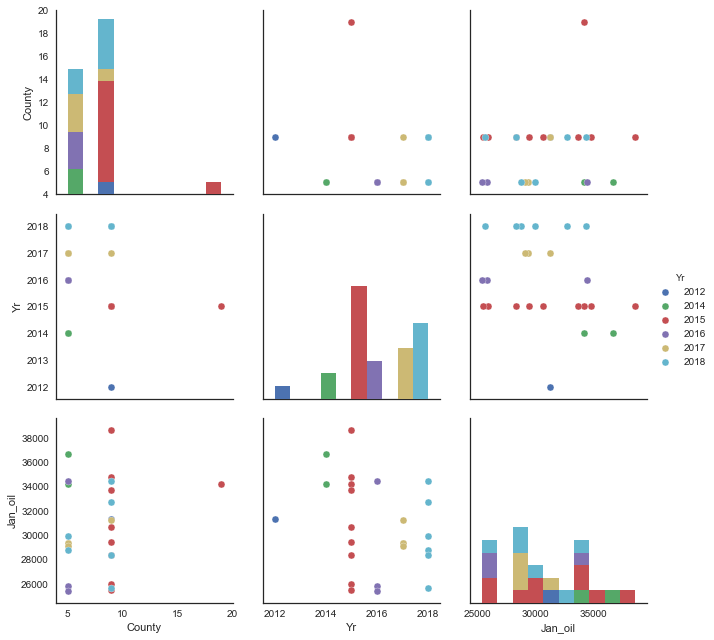

In [61]:
# pairplot, which shows the bivariate relation
# between each pair of features
sns.pairplot(data_viz, hue="Yr", size=3)

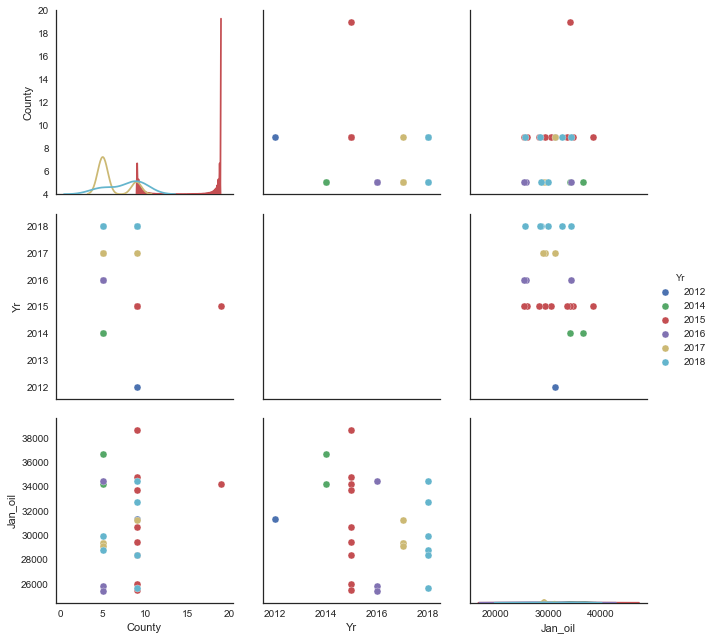

In [62]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(data_viz, hue="Yr", size=3, diag_kind="kde")

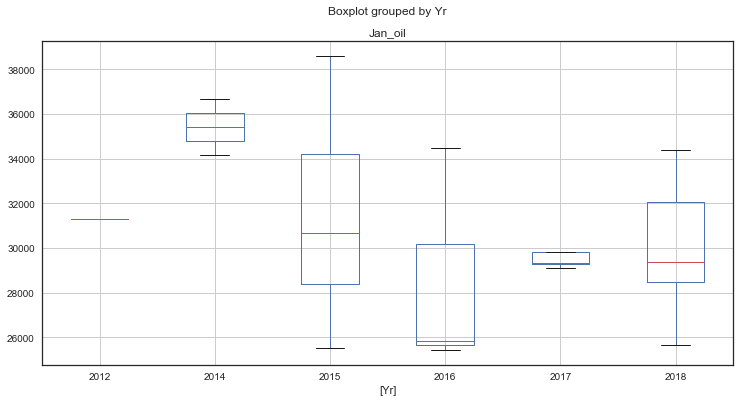

In [69]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
data_viz.drop("County", axis=1).boxplot(by="Yr", figsize=(12, 6))

In [77]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series and then plotting these
# Parallel coordinates plots each feature on a separate column & then draws lines connecting the features for each data sample
# Radviz puts each feature as a point on a 2D plane, and then simulates having each sample attached to those points through a spring weighted by the relative value for that feature

from pandas.tools.plotting import andrews_curves
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import radviz

#andrews_curves(data_viz, "Jan_oil")
#parallel_coordinates(data_viz.drop("County", axis=1), "Jan_oil")
#radviz(data_viz.drop("County", axis=1), "Jan_oil")